__лабораторная работа N1:__  базовые методы машинного обучения, метрический подход

__часть 1:__ решение задачи классификации

__цель:__ изучить возможности "классических" методов машинного обучения    
      на примере инструментов библиотеки scikit-learn

__порядок выполнения:__ для каждого типа задачи
1. получить/сгенерировать данные 
2. изучить/визуализировать данные
3. применить к ним соответствующий задаче метод,   
4. к результатам модели применить методы оценки  

In [79]:
import numpy as np
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from pandas import DataFrame

## данные

выбираем и загружаем датасет

In [80]:
from sklearn import datasets, svm 
# help(datasets)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


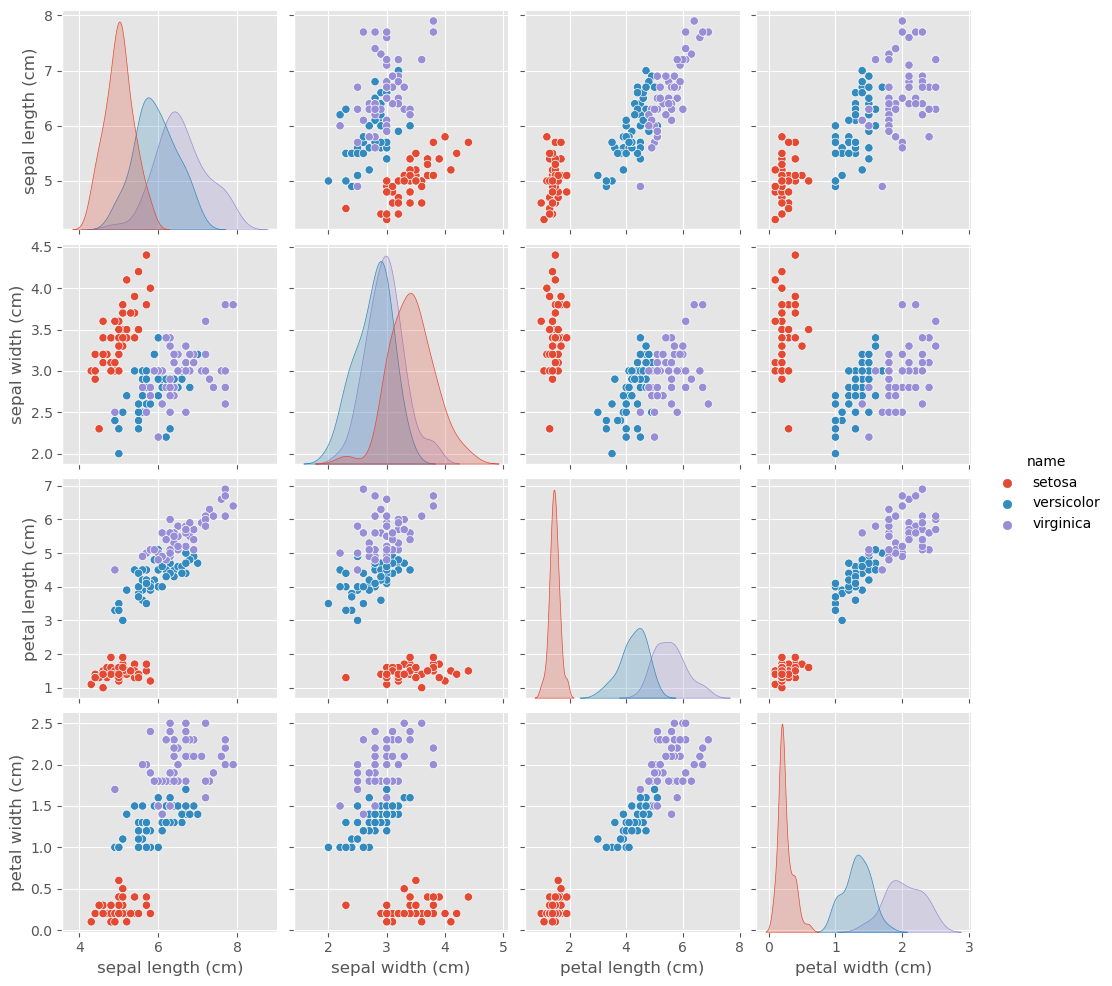

In [81]:
# выбираем один из вариантов

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Загружаем набор данных Ирисы:
iris = datasets.load_iris()
# Смотрим на названия переменных
print (iris.feature_names)
# Смотрим на данные, выводим 10 первых строк: 
print(iris.data[:10] )
# Смотрим на целевую переменную:
print (iris.target_names)
print (iris.target)
# https://archive.ics.uci.edu
# https://www.openml.org/search?type=data
# from sklearn.datasets import fetch_openml
# help(fetch_openml)
iris_frame = DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:
iris_frame

import seaborn as sns
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

## выделить тестовые данные

In [82]:
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3, random_state = 0)
# визуально проверяем, что получившееся разбиение соответствует нашим ожиданиям:
print(train_data)
print (test_data)
print (train_labels)
print (test_labels)



     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
60                 5.0               2.0                3.5               1.0
116                6.5               3.0                5.5               1.8
144                6.7               3.3                5.7               2.5
119                6.0               2.2                5.0               1.5
108                6.7               2.5                5.8               1.8
..                 ...               ...                ...               ...
9                  4.9               3.1                1.5               0.1
103                6.3               2.9                5.6               1.8
67                 5.8               2.7                4.1               1.0
117                7.7               3.8                6.7               2.2
47                 4.6               3.2                1.4               0.2

[105 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

## загружаем и обучаем модель классификатора

In [83]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)


In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#model = linear_model.SGDClassifier(alpha=0.001, iter=100, random_state = 0)
model.fit(train_data, train_labels)
model_predictions = model.predict(test_data)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## оценка результатов классификации

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [86]:
from sklearn.metrics import confusion_matrix # количество ошибок

from sklearn.metrics import classification_report # метрики качества

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

print (metrics.accuracy_score(test_labels, model_predictions))
print (metrics.classification_report(test_labels, model_predictions))



0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

